주어진 데이터셋을 차원 축소한 뒤 **다양한 알고리즘**을 적용하여 클러스터링을 진행하고, 결과를 시각화하는 작업을 직접 해보면서 **비지도학습** (Unsupervised Learning)에 대한 이해도를 높여 봅시다.

In [1]:
## 필요한 라이브러리를 임포트합니다.

import pandas as pd
import numpy as np

In [2]:
## 시각화 관련 라이브러리를 임포트합니다.

from matplotlib import pyplot as plt
import seaborn as sns

###데이터

사용할 데이터: 'Marketing Campaign.csv'

주어진 데이터는 마케팅 캠페인을 펼치고자 하는 소비자들에 대한 정보를 나타낸 데이터입니다. 해당 소비자들을 알맞게 군집화시키는 것이 우리의 목적입니다.

총 29개의 column으로 구성되어 있습니다. 



---







데이터에 대한 자세한 설명은 해당 kaggle 페이지에서 확인하실 수 있습니다.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

데이터를 불러옵니다.

In [3]:
## drive에 있는 데이터셋을 불러오기 위해 드라이브와 연동을 합니다.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## 'Marketing_campaign' 데이터의 위치를 불러와 저장합니다.

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScienceLab/정규세션/02.09/marketing_campaign.csv', \
                   sep = ';')
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

### 데이터 전처리

In [43]:
## 등록한 이후에 현재까지의 기간(회원 일수)를 'days'라는 변수로 저장.
from datetime import datetime
y = pd.to_datetime(datetime.today().strftime("%Y-%m-%d")) #datetime 타입으로 변환

data.Dt_Customer = pd.to_datetime(data.Dt_Customer) #datetime 타입으로 변환
data['days'] = y - data.Dt_Customer
data['days'] = data['days'] / np.timedelta64(1, 'D')
data['days'] = data['days'].astype('int') #int형으로 변환
data['days']

0       3814
1       3264
2       3463
3       3290
4       3312
        ... 
2235    3532
2236    3170
2237    3306
2238    3307
2239    3773
Name: days, Length: 2240, dtype: int64

In [8]:
## 나이를 age에 저장
data['age'] = 2024-data['Year_Birth']

In [44]:
data.iloc[:,20:25]

AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2
0                0             0             0             0             0
1                0             0             0             0             0
2                0             0             0             0             0
3                0             0             0             0             0
4                0             0             0             0             0
...            ...           ...           ...           ...           ...
2235             0             0             0             0             0
2236             0             0             0             1             0
2237             0             1             0             0             0
2238             0             0             0             0             0
2239             0             0             0             0             0

[2240 rows x 5 columns]

In [12]:
## 마케팅 캠페인에서의 총 참여 횟수
data['CampaignAttendance'] = data.iloc[:,20:25].sum(axis = 1)

## 이 데이터랑 군집화 결과가 얼마나 유사하게, 또는 다르게 나오는지 비교해봅시다~!!

In [14]:
data['CampaignAttendance'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: CampaignAttendance, dtype: int64

In [15]:
data.columns

features = ['days', 'age', 'Income', 'Recency', 'MntWines', 'MntFruits',\
                     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',\
                     'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', \
                     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',\
                    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','CampaignAttendance'] #우리가 고려할 변수들

In [16]:
X_features = data[features]
X_features = X_features.dropna().reset_index(drop = True) #결측치 제거

y_label = X_features['CampaignAttendance'] #캠페인에서의 총 참여 횟수를 임의의 라벨값으로 설정 -> 기준으로 삼아보자.

X_features = X_features.drop(['CampaignAttendance'], axis = 1)

In [17]:
## 각 변수들을 '표준화' scaling 합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_features_scaling  = scaler.fit_transform(X_features)

X_features_scaling = pd.DataFrame(X_features_scaling, columns = X_features.columns, index = list(X_features.index.values))

In [18]:
X_features_scaling

days       age    Income   Recency  MntWines  MntFruits  \
0     1.529129  0.986443  0.234063  0.310532  0.978226   1.549429   
1    -1.188411  1.236801 -0.234559 -0.380509 -0.872024  -0.637328   
2    -0.205155  0.318822  0.769478 -0.795134  0.358511   0.569159   
3    -1.059945 -1.266777 -1.017239 -0.795134 -0.872024  -0.561922   
4    -0.951244 -1.016420  0.240221  1.554407 -0.391671   0.418348   
...        ...       ...       ...       ...       ...        ...   
2211  0.135772  0.151917  0.356642 -0.104093  1.197646   0.418348   
2212 -1.652863  1.904422  0.467539  0.241428  0.299208  -0.662463   
2213 -0.980889 -1.016420  0.188091  1.450751  1.787710   0.544024   
2214 -0.975948  1.069896  0.675388 -1.417072  0.364441   0.091591   
2215  1.326548  1.236801  0.024705 -0.311405 -0.655568  -0.587058   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0            1.690227         2.454568          1.484827      0.850031  ...   
1           -0.717986        -0.651038         -0.633880     -0.732867  ...   
2           -0.178368         1.340203         -0.146821     -0.037937  ...   
3           -0.655551        -0.504892         -0.585174     -0.752171  ...   
4           -0.218505         0.152766         -0.000703     -0.559135  ...   
...               ...              ...               ...           ...  ...   
2211         0.066913         0.079693          2.215416      3.919308  ...   
2212        -0.610954        -0.687574         -0.658233     -0.694260  ...   
2213         0.223001        -0.102990         -0.365998     -0.385402  ...   
2214         0.209622         0.773887          0.072356      0.328832  ...   
2215        -0.472705        -0.651038         -0.633880     -0.443313  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0              0.693232     -0.281773     -0.282705     -0.280839   
1             -0.131574     -0.281773     -0.282705     -0.280839   
2             -0.543978     -0.281773     -0.282705     -0.280839   
3              0.280829     -0.281773     -0.282705     -0.280839   
4             -0.131574     -0.281773     -0.282705     -0.280839   
...                 ...           ...           ...           ...   
2211          -0.131574     -0.281773     -0.282705     -0.280839   
2212           0.693232     -0.281773     -0.282705     -0.280839   
2213           0.280829     -0.281773      3.537258     -0.280839   
2214          -0.956381     -0.281773     -0.282705     -0.280839   
2215           0.693232     -0.281773     -0.282705     -0.280839   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0        -0.261661     -0.117148 -0.097812            0.0        0.0  2.377952  
1        -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
2        -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
3        -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
4        -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
...            ...           ...       ...            ...        ...       ...  
2211     -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
2212      3.821732     -0.117148 -0.097812            0.0        0.0 -0.420530  
2213     -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
2214     -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
2215     -0.261661     -0.117148 -0.097812            0.0        0.0  2.377952  

[2216 rows x 24 columns]

###차원 축소

데이터를 차원 축소 해봅시다.

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## LDA
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_features_scaling, y_label) #차원축소 과정에 y 라벨값을 입력해줌

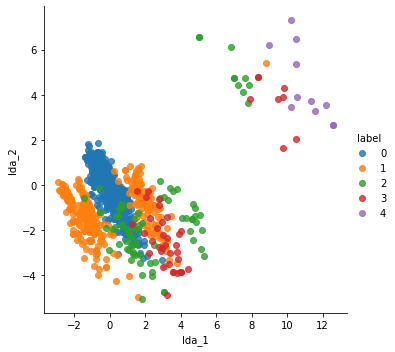

In [20]:
X_train_lda = pd.DataFrame(X_train_lda).loc[:,0:1]
X_train_lda = pd.concat((X_train_lda, y_label), axis = 1) #X_train_Ida와 y_label 데이터를 하나로 합치기
X_train_lda.columns = ['lda_1', 'lda_2', 'label']
X_train_lda

sns.lmplot(x = 'lda_1',y = 'lda_2',data = X_train_lda, hue = 'label', fit_reg = False)
plt.show()

## 우리가 원하는 정답 모양
## 캠페인 참여에서의 총 참여 횟수를 라벨값으로 둔 상태에서의 데이터 분포도

###K-means Clustering

클러스터링을 돌려 보는 데에 의의가 있기에, 파라미터 값 최적화보다는 각 알고리즘을 사용하면 결과가 어떻게 달라지는 지에 초점을 맞추어 살펴봅니다. 여러 번 시행해보면서 **자유롭게 파라미터를 정해주세요**.

**(직접 최적의 파라미터 값을 찾아서 설정하고 싶으시다면 훨씬 좋습니다! 해당 과제의 모든 코드는 기본 뼈대일 뿐입니다. 코드를 추가 또는 변경하셔도 좋습니다.)**

다른 x값들에 대해서도 캠페인 참여도, 즉 고객의 충실도를 잘 군집화할 수 있을까요? 클러스터링으로 결과를 확인해봅시다.



---





K-means를 이용하여 클러스터링 해봅시다.

In [21]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import KMeans

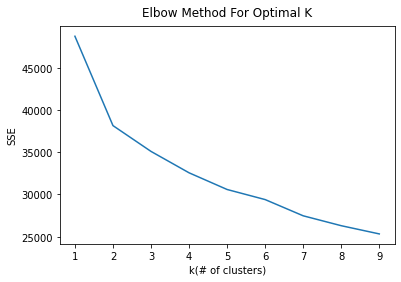

In [22]:
sse = []

K = range(1, 10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X_features_scaling)
    sse.append(km.inertia_)
plt.plot(K, sse)
plt.xlabel('k(# of clusters)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K', pad = 10)
plt.show()

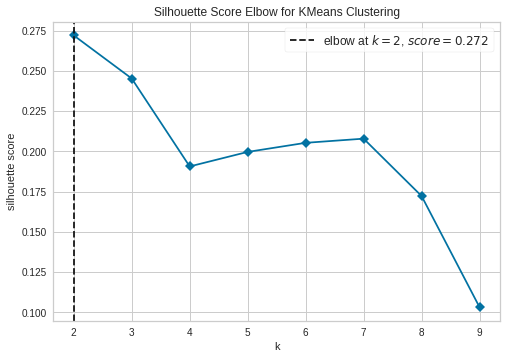

In [25]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
elbowvisualizer = KElbowVisualizer(model, k = (2, 10), metric = 'silhouette', timings = False)
elbowvisualizer.fit(X_features_scaling)
elbowvisualizer.show()

In [26]:
## 클러스터 수는 ########(숫자)########로 설정하고, KMeans를 활용하여 예측된 y값을 만들어 봅시다.

km = KMeans(n_clusters = 2)

y_km = km.fit_predict(X_features_scaling)
y_km

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [27]:
X_train_lda['K_means'] = y_km

####시각화

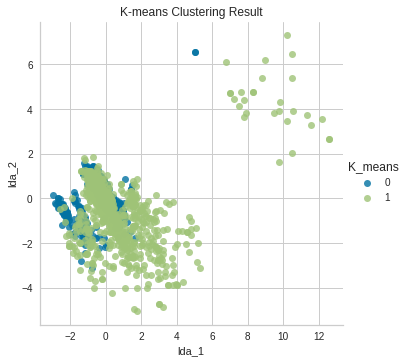

In [28]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'K_means', fit_reg = False)
plt.title('K-means Clustering Result')
plt.show()

###Hierarchical Clustering

Agglomerative 방법을 이용하여 클러스터링 해봅시다.

In [30]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import AgglomerativeClustering

In [60]:
## 클러스터 수는 ########(숫자)########로 설정하고, Agglomerative를 활용하여 예측된 y값을 만들어 봅시다.

agghc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward') #와드연결법을 사용합니다.

y_agghc = agghc.fit_predict(X_features_scaling)
y_agghc

array([0, 1, 0, ..., 1, 0, 1])

In [61]:
X_train_lda['hierarchical'] = y_agghc

####시각화

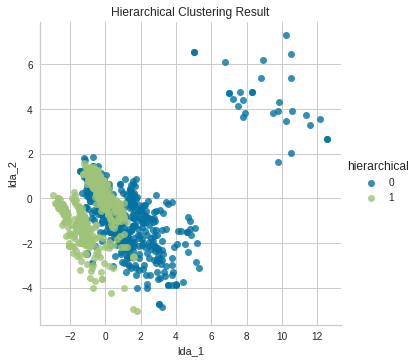

In [62]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'hierarchical', fit_reg = False)
plt.title('Hierarchical Clustering Result')
plt.show()

###DBSCAN

DBSCAN을 이용하여 클러스터링 해봅시다.

In [34]:
## 필요한 라이브러리를 임포트합니다.
from sklearn.cluster import DBSCAN
import sklearn.utils
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors

In [36]:
X_features_scaling

days       age    Income   Recency  MntWines  MntFruits  \
0     1.529129  0.986443  0.234063  0.310532  0.978226   1.549429   
1    -1.188411  1.236801 -0.234559 -0.380509 -0.872024  -0.637328   
2    -0.205155  0.318822  0.769478 -0.795134  0.358511   0.569159   
3    -1.059945 -1.266777 -1.017239 -0.795134 -0.872024  -0.561922   
4    -0.951244 -1.016420  0.240221  1.554407 -0.391671   0.418348   
...        ...       ...       ...       ...       ...        ...   
2211  0.135772  0.151917  0.356642 -0.104093  1.197646   0.418348   
2212 -1.652863  1.904422  0.467539  0.241428  0.299208  -0.662463   
2213 -0.980889 -1.016420  0.188091  1.450751  1.787710   0.544024   
2214 -0.975948  1.069896  0.675388 -1.417072  0.364441   0.091591   
2215  1.326548  1.236801  0.024705 -0.311405 -0.655568  -0.587058   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0            1.690227         2.454568          1.484827      0.850031  ...   
1           -0.717986        -0.651038         -0.633880     -0.732867  ...   
2           -0.178368         1.340203         -0.146821     -0.037937  ...   
3           -0.655551        -0.504892         -0.585174     -0.752171  ...   
4           -0.218505         0.152766         -0.000703     -0.559135  ...   
...               ...              ...               ...           ...  ...   
2211         0.066913         0.079693          2.215416      3.919308  ...   
2212        -0.610954        -0.687574         -0.658233     -0.694260  ...   
2213         0.223001        -0.102990         -0.365998     -0.385402  ...   
2214         0.209622         0.773887          0.072356      0.328832  ...   
2215        -0.472705        -0.651038         -0.633880     -0.443313  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0              0.693232     -0.281773     -0.282705     -0.280839   
1             -0.131574     -0.281773     -0.282705     -0.280839   
2             -0.543978     -0.281773     -0.282705     -0.280839   
3              0.280829     -0.281773     -0.282705     -0.280839   
4             -0.131574     -0.281773     -0.282705     -0.280839   
...                 ...           ...           ...           ...   
2211          -0.131574     -0.281773     -0.282705     -0.280839   
2212           0.693232     -0.281773     -0.282705     -0.280839   
2213           0.280829     -0.281773      3.537258     -0.280839   
2214          -0.956381     -0.281773     -0.282705     -0.280839   
2215           0.693232     -0.281773     -0.282705     -0.280839   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0        -0.261661     -0.117148 -0.097812            0.0        0.0  2.377952  
1        -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
2        -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
3        -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
4        -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
...            ...           ...       ...            ...        ...       ...  
2211     -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
2212      3.821732     -0.117148 -0.097812            0.0        0.0 -0.420530  
2213     -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
2214     -0.261661     -0.117148 -0.097812            0.0        0.0 -0.420530  
2215     -0.261661     -0.117148 -0.097812            0.0        0.0  2.377952  

[2216 rows x 24 columns]

In [38]:
nb = NearestNeighbors(n_neighbors = 4).fit(X_features_scaling)

In [39]:
minPts = 4

In [40]:
distances, indices = nb.kneighbors(X_features_scaling)

In [41]:
distances

array([[1.19209290e-07, 3.34668520e+00, 3.52977034e+00, 3.53985459e+00],
       [0.00000000e+00, 9.09903423e-01, 9.39336054e-01, 9.58490843e-01],
       [0.00000000e+00, 1.63108673e+00, 1.92351889e+00, 2.01634054e+00],
       ...,
       [0.00000000e+00, 2.85466117e+00, 3.02415529e+00, 3.27335510e+00],
       [0.00000000e+00, 1.42852458e+00, 1.70955064e+00, 1.75579970e+00],
       [0.00000000e+00, 1.14949383e+00, 1.40752549e+00, 1.54215594e+00]])

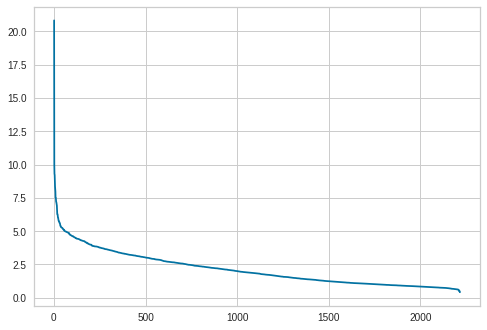

In [42]:
distance = sorted(distances[:,minPts-1], reverse = True)
plt.plot(list(range(1, 2217)), distance)

In [51]:
## eps는 ########(숫자)########, minPts는 ########(숫자)########로 설정한 뒤 DBSCAN를 활용하여 예측된 y값을 만들어 봅시다.

dbscan = DBSCAN(eps = 0.07, min_samples = 4, metric = 'euclidean') #eps는 0-1

y_dbscan = dbscan.fit(X_features_scaling)
y_dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [52]:
X_train_lda['dbscan'] = y_dbscan.labels_

In [53]:
X_train_lda.dbscan

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2211   -1
2212   -1
2213   -1
2214   -1
2215   -1
Name: dbscan, Length: 2216, dtype: int64

####시각화

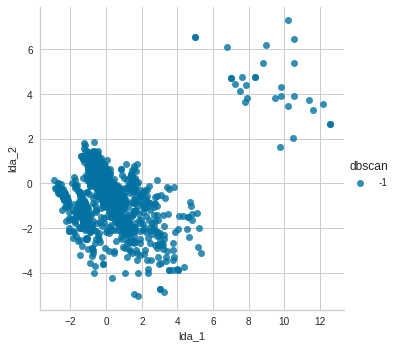

In [54]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'dbscan', fit_reg = False)
plt.show()

###Validation

실루엣 계수를 사용하여 각 클러스터링의 성능을 평가해봅시다.



---



(Q) 실루엣 계수로 평가하기 전에, 육안 상으로 어떠한 알고리즘의 성능이 제일 높아 보이며 어떠한 알고리즘의 성능이 제일 낮아 보이는지 의견을 적어주세요.

- dbscan의 성능이 제일 낮아보임
-- eps의 값도 크게 나올뿐더러 임의의 eps 값을 넣어줄 경우 모든 label 값이 -1로 나오는 경우가 생김



---



이제 실루엣 계수로 성능을 평가해 봅시다!

In [63]:
## 필요한 라이브러리를 임포트합니다.

import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

K-means Clustering의 실루엣 계수입니다.

In [64]:
coef_km = metrics.silhouette_score(X_features_scaling, y_km)
print('Silhouette score is {}.'.format(coef_km))

Silhouette score is 0.2720303244969593.


Hierarchical Clustering의 실루엣 계수입니다.

In [65]:
## Hierarchical Clustering

coef_hc = metrics.silhouette_score(X_features_scaling, y_agghc)
print('Silhouette score is {}.'.format(coef_hc))

Silhouette score is 0.24392857890655703.


DBSCAN의 실루엣 계수입니다.

In [59]:
## DBSCAN

coef_db = metrics.silhouette_score(X_features_scaling, y_dbscan.labels_)
print('Silhouette score is {}.'.format(coef_db))

ValueError: ignored

(Q) 실루엣 계수를 기반으로, 클러스터링 알고리즘의 성능을 높은 순대로 적어주세요.

- K-means -> hierarchical -> DBSCAN

(Q) 클러스터링 결과에 대한 해석을 적어주세요. (참고로, 실루엣 계수는 -1에서 1 사이의 값을 가집니다.)

- DBSCAN의 경우 모든 label이 -1로 분류되어 제대로 된 성능평가를 할 수 없었음
- K-means Method가 hierarchical clustering보다 소폭 높은 성능을 보여줌

(Q) 마케팅 캠페인과 관련하여 도출할 수 있는 인사이트를 적어주세요.

너무 많은 변수를 고려할 경우 클러스터링 성능 평가가 제대로 이루어지지 않을 수 있을 것 같음.